# CS211: Data Privacy
## In-Class Exercises, week of 9/12/2022

In [2]:
# Load the data and libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

adult = pd.read_csv('https://github.com/jnear/cs211-data-privacy/raw/master/homework/adult_with_pii.csv')

#Formual: Aggregate + noise

## Question 1

Write a *counting query* to determine whether or not Karrie Trusslove's age is 39.

In [3]:
def karrie_query():
    return len(adult[(adult['Name'] == 'Karrie Trusslove') & (adult['Age'] == 39)]) 

In [4]:
# TEST CASE 

assert karrie_query() == 1

## Question 2

Add Laplace noise to the counting query you wrote in the last question to ensure differential privacy for $\epsilon = 1.0$.

In [31]:
epsilon = 1 # Big epsilon gets closer to the right number because the noise samples are much smaller
sensitivity = 1

def dp_karrie_query():
    true_answer = karrie_query()
    noise = np.random.laplace(loc=0, scale=sensitivity/epsilon)# Noise from laplace distribution
    return true_answer + noise



In [32]:
dp_karrie_query()

0.4246879809654428

In [33]:
# TEST CASE 

q2_runs = [dp_karrie_query() for _ in range(100)]
noise_runs = [np.random.laplace(loc=1, scale=1/epsilon) for _ in range(100)]

assert stats.wasserstein_distance(q2_runs, noise_runs) < 1

## Question 3

In 2-4 sentences, describe how `dp_karrie_query` protects Karrie's privacy.

Noise is added to introduce artifical uncertainty into the answer. The noise prevents us from making inferences about Karrie's age without 100% certainty. I am roughly equally likley to see a specific answer for the query, regardless of Karrie's age. 

## Question 4

Implement a function to construct an *empirical distribution* over random samples from the Laplace distribution with location 0 and scale `scale`. Use 1000 samples.

(array([  9.,  18.,  27., 121., 324., 336., 109.,  34.,  16.,   6.]),
 array([-5.74363791, -4.60034441, -3.45705091, -2.31375741, -1.1704639 ,
        -0.0271704 ,  1.1161231 ,  2.2594166 ,  3.4027101 ,  4.54600361,
         5.68929711]),
 <BarContainer object of 10 artists>)

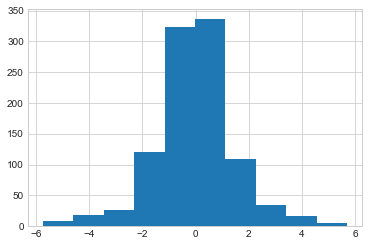

In [34]:
scale = 1
plt.hist([np.random.laplace(loc=0, scale=scale) for _ in range(1000)])

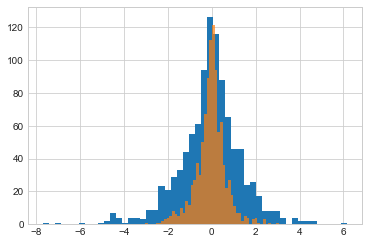

In [35]:
def empirical_dist_lap(scale):
    # Run laplace mechanism a bunch of times and graph results
    return [np.random.laplace(loc=0, scale=scale) for _ in range(1000)]

epsilon1 = 1.0
epsilon2 = 2.0
# if distribution is "pointy" = less uncertainty, an adversary can conclude more confidently 
# that the inferences they make about the data are correct... the noise samples are not very noisy, this means not much privacy


plt.hist(empirical_dist_lap(1/epsilon1), bins=50);
plt.hist(empirical_dist_lap(1/epsilon2), bins=50, alpha=.7);

In [36]:
# PLACEHOLDER for test cases


In [37]:
np.exp(1)

2.718281828459045

-12.855273156617725 1.0 0.0 inf
-12.625697288371308 1.0 0.0 inf
-12.396121420124889 0.0 0.0 nan
-12.166545551878471 0.0 0.0 nan
-11.936969683632052 0.0 0.0 nan
-11.707393815385634 0.0 0.0 nan
-11.477817947139215 0.0 0.0 nan
-11.248242078892797 0.0 0.0 nan
-11.01866621064638 1.0 0.0 inf
-10.78909034239996 1.0 0.0 inf
-10.559514474153543 0.0 0.0 nan
-10.329938605907124 0.0 0.0 nan
-10.100362737660706 1.0 0.0 inf
-9.870786869414289 0.0 0.0 nan
-9.64121100116787 0.0 1.0 0.0
-9.411635132921452 2.0 1.0 2.0
-9.182059264675033 1.0 0.0 inf
-8.952483396428615 1.0 1.0 1.0
-8.722907528182198 0.0 3.0 0.0
-8.493331659935778 3.0 1.0 3.0
-8.26375579168936 3.0 1.0 3.0
-8.034179923442942 5.0 2.0 2.5
-7.804604055196523 5.0 3.0 1.6666666666666667
-7.575028186950106 6.0 2.0 3.0
-7.345452318703687 4.0 3.0 1.3333333333333333
-7.115876450457269 5.0 3.0 1.6666666666666667
-6.8863005822108505 13.0 4.0 3.25
-6.656724713964432 18.0 12.0 1.5
-6.427148845718014 20.0 6.0 3.3333333333333335
-6.197572977471596 21.0 11

C:\Users\James\AppData\Local\Temp\ipykernel_4620\2752598180.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  print(bin_val, count1, count2, count1 / count2)
C:\Users\James\AppData\Local\Temp\ipykernel_4620\2752598180.py:6: RuntimeWarning: invalid value encountered in double_scalars
  print(bin_val, count1, count2, count1 / count2)


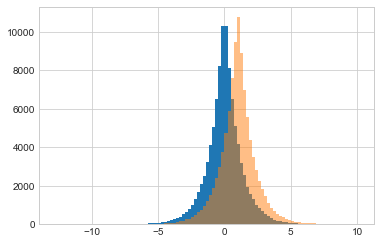

In [46]:
counts1, bins, _ = plt.hist([np.random.laplace(loc=0, scale=1/1) for _ in range(100000)], bins=100)
counts2, _, _ = plt.hist([np.random.laplace(loc=1, scale=1/1) for _ in range(100000)], bins=bins, alpha=.5)
list(zip(bins, counts1, counts2))

for bin_val, count1, count2 in zip(bins,counts1,counts2):
    print(bin_val, count1, count2, count1 / count2) # This ratio should be less than e^epsilon
    
# The overlap from created from the uncertainty 

## Question 5

Consider the program below.

In [48]:
counting_query = lambda: 1

result_1 = counting_query() + np.random.laplace(loc=0, scale=1/epsilon1)
result_2 = counting_query() + np.random.laplace(loc=0, scale=1/epsilon2)
result_3 = counting_query() + np.random.laplace(loc=0, scale=1/epsilon1)

print(result_1, result_2, result_3)

-0.030238976310805965 0.8885782539517675 -1.0162307391242305


Write a function `total_epsilon` that returns the total privacy cost for this program.

In [49]:
# Sequential composition... Need two mechanisms ensuring differential privacy to get differential privacy.
# Scale analogy! Adding up epsilons (privacy parameter/budget)

def total_epsilon():
    return epsilon1 + epsilon2 + epsilon1
    
total_epsilon()

4.0

In [ ]:
# Placeholder for test case
